In [1]:
import os
from pathlib import Path

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize


In [2]:
result_dir = Path(os.getcwd())

proj_dir = result_dir.parent

os.chdir(proj_dir)

In [3]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [4]:
save_path = Path("C:/Users/bruij_kn/OneDrive - Stichting Deltares/Documents/GitHub/msc-thesis/Figures/Python")

In [5]:
from utils.results import SimulationResults

RUNID = "val3"

results = SimulationResults(runid=RUNID)

print(results.var_list)
print(results.timestep_output_ids)

['xgr', 'depth_id', 'timestep_id', 'timestamp', 'cumulative_computational_time', 'zgr', 'angles', 'wave_height', 'wave_energy', 'radiation_stress_xx', 'radiation_stress_xy', 'radiation_stress_yy', 'mean_wave_angle', 'velocity_magnitude', 'orbital_velocity', 'run_up', 'water_level', 'thaw_depth', 'abs_xgr', 'abs_zgr', 'ground_temperature_distribution', 'ground_enthalpy_distribution', '2m_temperature', 'sea_surface_temperature', 'solar_radiation_factor', 'solar_radiation_flux', 'long_wave_radiation_flux', 'latent_heat_flux', 'convective_heat_flux', 'total_heat_flux', 'sea_ice_cover', 'wind_velocity', 'wind_direction']
[   0    1    2 ... 2205 2206 2207]


In [6]:
xgr0 = results.get_var_timestep("xgr", 0)
zgr0 = results.get_var_timestep("zgr", 0)

abs_xgr0 = results.get_var_timestep("abs_xgr", 0).flatten()
abs_zgr0 = results.get_var_timestep("abs_zgr", 0).flatten()
ground_temperature_distribution0 = (results.get_var_timestep(
    "ground_temperature_distribution", 0) - 273.15).flatten()

In [7]:
vmin, vmax = -10, 10

norm = Normalize(vmin, vmax)

sm = ScalarMappable(norm, cmap='coolwarm')

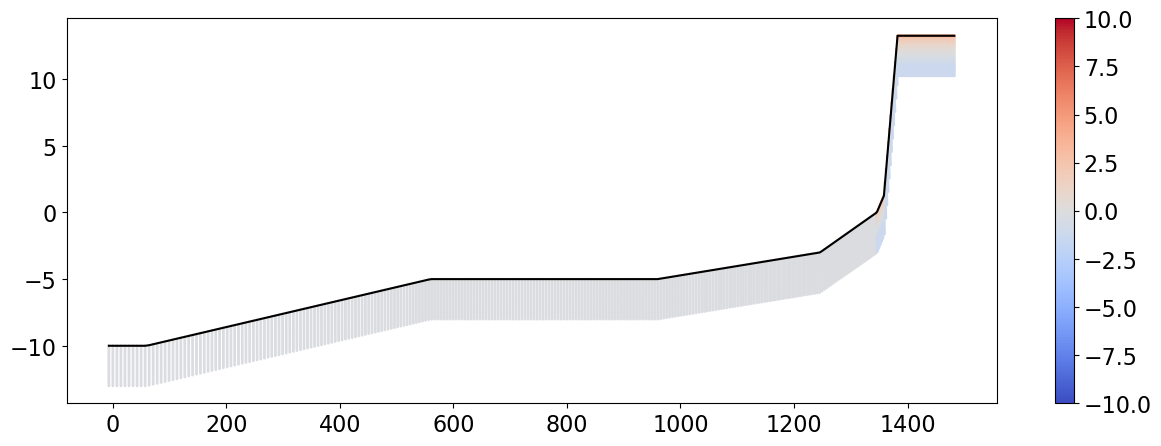

In [12]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(xgr0, zgr0, color='k')

scatter = ax.scatter(abs_xgr0, abs_zgr0, s=1, color=sm.to_rgba(ground_temperature_distribution0))

# ax.set_xlim(1300, 1400)

# ax.set_aspect('equal')

plt.colorbar(sm, ax=ax, norm=norm)

In [9]:
print(ground_temperature_distribution0)

[ 0.31139707  0.09594327 -0.22529011 ... -1.27765019 -1.27765019
 -1.27765019]


In [10]:
print((results.get_var_timestep(
    "ground_temperature_distribution", 1) - 273.15)[:,0])

[0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607
 0.30866607 0.30866607 0.30866607 0.30866607 0.30866607 0.3086

So the temperature jumps down after a single timestep. Why? Let's look at the enthalpy

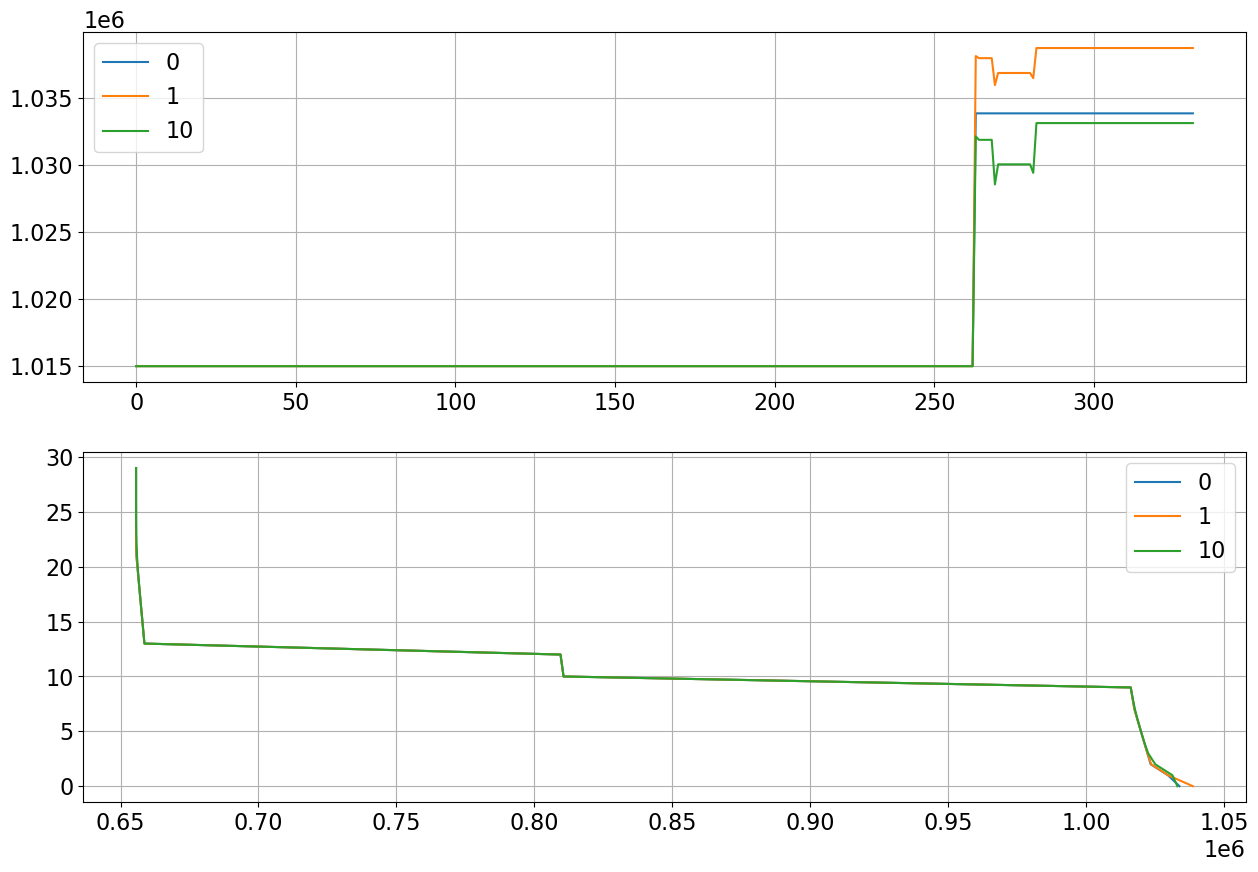

In [11]:
enthalpy0 = results.get_var_timestep("ground_enthalpy_distribution", 0)
enthalpy1 = results.get_var_timestep("ground_enthalpy_distribution", 1)
enthalpy10 = results.get_var_timestep("ground_enthalpy_distribution", 10)

fig, axs = plt.subplots(2, 1, figsize=(15,10))
ax, ax1 = axs

ax.plot(np.arange(enthalpy0.shape[0]), enthalpy0[:,0], label=0)
ax.plot(np.arange(enthalpy1.shape[0]), enthalpy1[:,0], label=1)
ax.plot(np.arange(enthalpy10.shape[0]), enthalpy10[:,0], label=10)

ax1.plot(enthalpy0[300,:], np.arange(enthalpy0.shape[1]), label=0)
ax1.plot(enthalpy1[300,:], np.arange(enthalpy1.shape[1]), label=1)
ax1.plot(enthalpy10[300,:], np.arange(enthalpy10.shape[1]), label=10)

ax.grid()
ax.legend()

ax1.grid()
ax1.legend()